In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


C:\Users\dell\PycharmProjects\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dell\PycharmProjects\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dell\PycharmProjects\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dell\PycharmProjects\neural\lib\site-packages\tensorflow\pyth

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(10000, 32, 32, 3)
10000


In [6]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

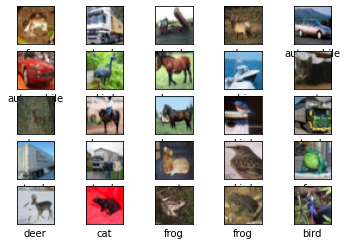

In [7]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [8]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.summary()
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [9]:
# #'sparse_categorical_crossentropy'
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.summary()
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# # model.add(layers.Dropout(.3))
# model.add(layers.Dense(10))
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [10]:
model = models.Sequential([
        layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        layers.MaxPool2D(2,2),
        layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
        layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
        layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        layers.MaxPool2D(2,2),
        layers.Flatten() ,
        layers.Dense(120,activation='relu') ,
        layers.Dense(100,activation='relu') ,
        layers.Dense(50,activation='relu') ,
        layers.Dropout(rate=0.5) ,
        layers.Dense(10,activation='softmax') ,
        ])

In [11]:
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 50)          36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
__________

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels,batch_size=60, epochs=3,
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 2795s 56ms/step - loss: 1.8553 - acc: 0.3089 - val_loss: 1.4439 - val_acc: 0.4682
Epoch 2/3
50000/50000 [==============================] - 2768s 55ms/step - loss: 1.4541 - acc: 0.4828 - val_loss: 1.3299 - val_acc: 0.5338
Epoch 3/3
50000/50000 [==============================] - 2860s 57ms/step - loss: 1.2681 - acc: 0.5556 - val_loss: 1.1333 - val_acc: 0.5927


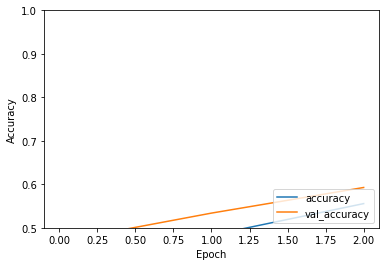

In [18]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)



0.5927


In [21]:
model.save('image_prediction_model')

In [22]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[1.04560095e-19 6.14432477e-30 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.72917343e-34
 0.00000000e+00 1.00000000e+00]
9
[3]


In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [24]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [1]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#converting 2d array into 1d arra
train_labels=np.ravel(train_labels)
test_labels=np.ravel(test_labels)

plot_image(i, predictions, np.array(test_labels), test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

NameError: name 'plt' is not defined

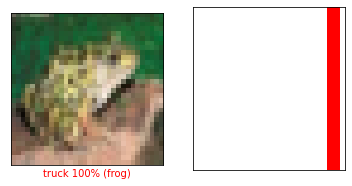

In [31]:
i = 512
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [ ]:
#new_model=tf.keras.models.load_model('TestModel')